<a href="https://colab.research.google.com/github/enjimohamed/CODSOFT/blob/main/TITANICSURVIVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Read File

In [122]:
fl=pd.read_csv("/content/Titanic-Dataset.csv")

In [123]:
fl.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# preprocessing

In [124]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
fl.duplicated().sum()

0

In [126]:
fl.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [127]:
agemean=fl['Age'].mean()

In [128]:
fl['Age'].fillna(agemean,inplace=True)

In [129]:
fl=fl.drop(columns='Cabin')

In [130]:
emmode=fl['Embarked'].mode()[0]

In [131]:
fl['Embarked'].fillna(emmode,inplace=True)

In [132]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Data Visualization

<Axes: xlabel='Sex', ylabel='count'>

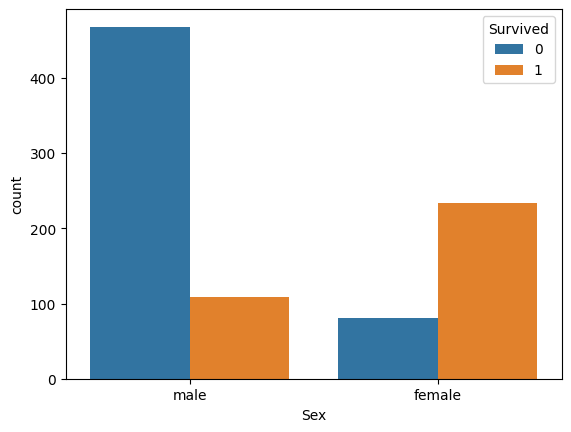

In [133]:
sns.countplot(x='Sex',  data=fl,hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

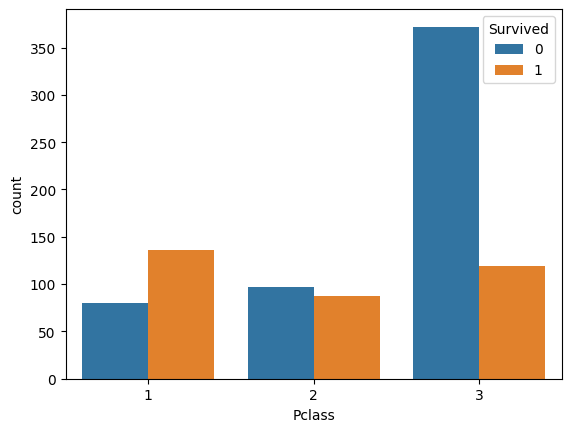

In [134]:
sns.countplot(x='Pclass',  data=fl,hue='Survived')

# Data Encoding

In [135]:

fl['Sex']=fl['Sex'].map({'male':0,'female':1})
fl['Embarked']=fl['Embarked'].map({'S':0,'C':1,'Q':2})

In [136]:
fl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB


# Models

In [137]:
x=fl.drop(["PassengerId","Survived","Name","Ticket"],axis=1)
y=fl['Survived']

In [138]:
scaler_minmax = MinMaxScaler()
X_scaled = scaler_minmax.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Accuracy: 0.8022388059701493


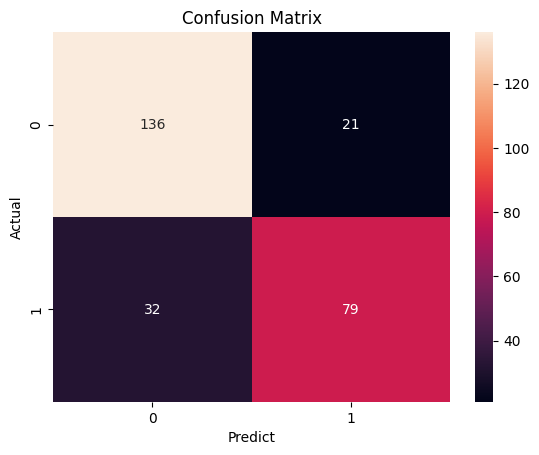

In [139]:
logisticreg=LogisticRegression()
logisticreg.fit(x_train,y_train)
ypredict=logisticreg.predict(x_test)
accuracy = accuracy_score(y_test, ypredict)
print("Accuracy:", accuracy)
cm=confusion_matrix(y_test,ypredict)

sns.heatmap(cm,annot=True,fmt="d")

plt.title('Confusion Matrix')
plt.xlabel("Predict")
plt.ylabel("Actual")
plt.show()